In [35]:
%matplotlib notebook
import numpy as np
import json, glob
import os, math
import pandas as pd
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from IPython.display import clear_output, display
from datetime import datetime
from scipy.stats.stats import pearsonr

from alvra_tools.load_data import *
from alvra_tools.channels import *
from alvra_tools import timing_tool
from alvra_tools.utils import *
from alvra_tools.YAG_scans import *
from ipyfilechooser import FileChooser

### Choose the json file:

In [36]:
fc = FileChooser('/sf/alvra/data/p19200/raw/scan_info/')
fc.use_dir_icons = True
display(fc)

FileChooser(path='/sf/alvra/data/p19200/raw/scan_info', filename='', title='HTML(value='', layout=Layout(displ…

In [3]:
quantile_band = 0.5

channel_delay_motor = channel_delay_harm
#channel_delay_motor = channel_delay_global
timezero_mm = 0#225.2791
#timezero_mm = 40.1814

targetM2 = 'YAG'
#px2fsM2 = 2.044
px2fsM2 = 1.91 ## calibration from 14.10.2021
px2fsM2 = 1.8 ## calibration from 15.10.2021
px2fsM2 = 1.92 ## calibration from 16.10.2021
px2fsM2 = 1.8692375 ## calibration from 17.10.2021


targetM1 = 'babyYAG'
#px2fsM1 = 1.957
px2fsM1 = 1.518 ## calibration from 14.10.2021, white light
px2fsM1 = 1.18 ## calibration from 15.10.2021, NOPA
px2fsM1 = 2.57 ## calibration from 16.10.2021, NOPA stretched
px2fsM1 = 1.833608 ## calibration from 17.10.2021, white light different grating


filterTimeM1 = 2048
filterAmpM1 = 0
########################################
#YAG_scan_two_TT(json_file, channel_delay_motor, timezero_mm, quantile, 
#                    target_1, calibration_1, target_2, calibration_2,
#                    filterTime_1=2000, filterAmp_1=0, filterTime_2=2000, filterAmp_2=0):
########################################


Delay_fs_stage, Delay_fs, Delays_corr_M2, Delays_corr_M1, Pump_probe, Pump_probe_scan, Izero_scan, Amplitude_M2, Amplitude_M1,_ = \
YAG_scan_two_TT(fc.selected, channel_delay_motor, timezero_mm, quantile_band, targetM2, px2fsM2, targetM1, px2fsM1,\
                2048, 0, filterTimeM1, filterAmpM1)

#Delays_corr_M2 -= Delay_fs
#Delays_corr_M1 -= Delay_fs

pp_uncorrected = Pump_probe[:,0]
err_pp_low = Pump_probe[:,1]
err_pp_high = Pump_probe[:,2]

Processing: 001_YAG_scan_loop_001.json
Step 41 of 41: Processing run_000085

--------------------------------------------------------------------------------

SAR-CVME-TIFALL4:EvtSet                     502 / 502 ->  0% loss ▇▇▇▇▇▇▇▇▇▇
SARES11-SPEC125-M1.roi_signal_x_profile     481 / 502 ->  4% loss ▇▇▇▇▇▇▇▇▇
SARES11-SPEC125-M2.roi_background_x_profile 455 / 502 ->  9% loss ▇▇▇▇▇▇▇▇▇
SARES11-SPEC125-M2.roi_signal_x_profile     455 / 502 ->  9% loss ▇▇▇▇▇▇▇▇▇
SAROP11-PBPS117:INTENSITY                   502 / 502 ->  0% loss ▇▇▇▇▇▇▇▇▇▇
SLAAR11-LMOT-M453:ENC_1_BS                  502 / 502 ->  0% loss ▇▇▇▇▇▇▇▇▇▇
SLAAR11-LSCP1-FNS:CH0:VAL_GET               502 / 502 ->  0% loss ▇▇▇▇▇▇▇▇▇▇
SLAAR11-LSCP1-FNS:CH2:VAL_GET               502 / 502 ->  0% loss ▇▇▇▇▇▇▇▇▇▇

over the whole data set: 434 / 502 -> 14% loss
complete channels: 5 / 8 -> 38% incomplete

--------------------------------------------------------------------------------

Pump rep rate (FEL) is 50.0 Hz
Probe rep rate (laser) 

<IPython.core.display.Javascript object>


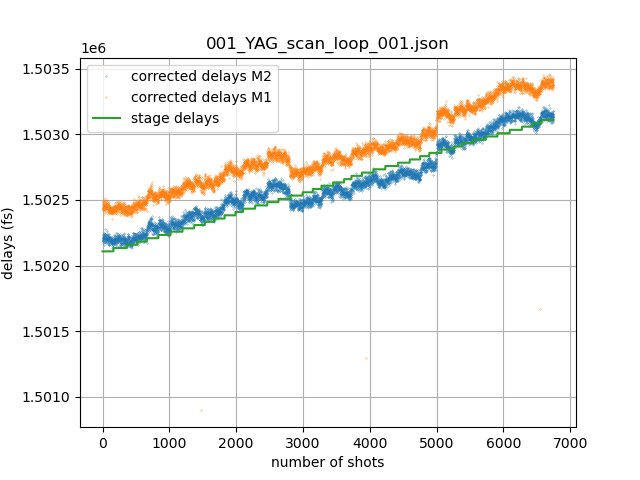

In [4]:
plt.figure()
plt.title(fc.selected_filename)

plt.plot(Delays_corr_M2, '.', ms=0.5, label = 'corrected delays M2')
plt.plot(Delays_corr_M1, '.', ms=0.5, label = 'corrected delays M1')
plt.plot(Delay_fs, label = 'stage delays')

plt.legend(loc='best')
plt.xlabel('number of shots')
plt.ylabel('delays (fs)')

plt.grid()
plt.show()

/sf/alvra/anaconda/alvra-analysis/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>


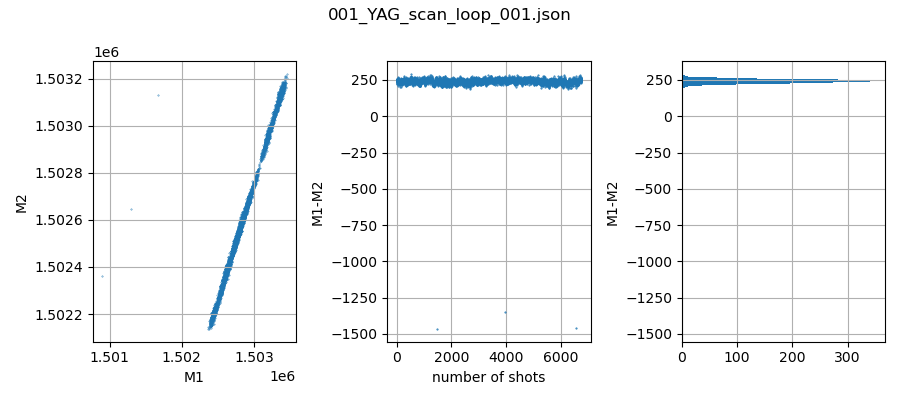

width = 37.70995506837699 rms


In [5]:
plt.figure(figsize=(9,4))
plt.suptitle(fc.selected_filename)

plt.subplot(131)
plt.scatter(Delays_corr_M1, Delays_corr_M2, s=0.1)
plt.xlabel('M1')
plt.ylabel('M2')
plt.grid()
plt.show()

plt.subplot(132)
plt.plot(Delays_corr_M1 - Delays_corr_M2, '.', ms=1)
plt.xlabel('number of shots')
plt.ylabel('M1-M2')
#plt.ylim(0,400)
plt.grid()

plt.subplot(133)
plt.hist(Delays_corr_M1 - Delays_corr_M2, bins= 1000, orientation=u'horizontal')
#plt.ylim(0,400)
plt.ylabel('M1-M2')
plt.grid()

plt.tight_layout()
plt.show()

print ('width = {} rms'.format(np.std(Delays_corr_M1 - Delays_corr_M2)))

<IPython.core.display.Javascript object>


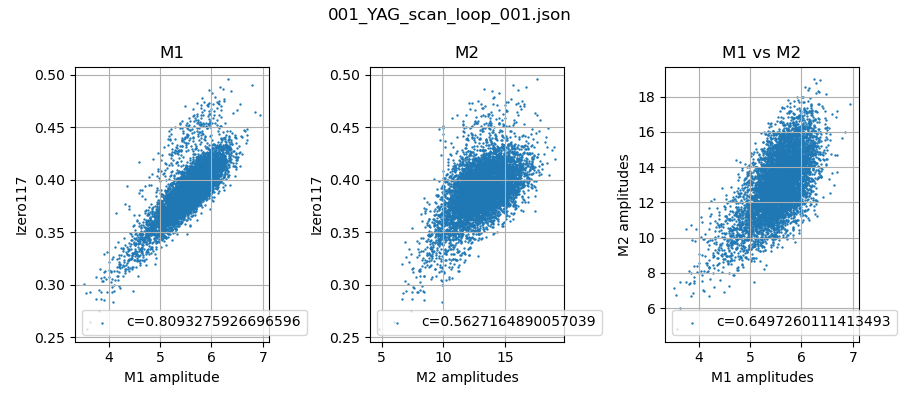

In [7]:
plt.figure(figsize = (9,4))
plt.suptitle (fc.selected_filename)

plt.subplot(131)
plt.title('M1')
plt.scatter(Amplitude_M1, Izero_scan, label = 'c={}'.format(pearsonr(Amplitude_M1, Izero_scan)[0]), s =0.5)
plt.legend(loc='best')
plt.xlabel('M1 amplitude')
plt.ylabel('Izero117')
plt.grid()

plt.subplot(132)
plt.title('M2')
plt.scatter(Amplitude_M2, Izero_scan, label = 'c={}'.format(pearsonr(Amplitude_M2, Izero_scan)[0]), s =0.5)
plt.legend(loc='best')
plt.xlabel('M2 amplitudes')
plt.ylabel('Izero117')
plt.grid()

plt.subplot(133)
plt.title('M1 vs M2')
plt.scatter(Amplitude_M1, Amplitude_M2, label = 'c={}'.format(pearsonr(Amplitude_M1, Amplitude_M2)[0]), s =0.5)
plt.legend(loc='best')
plt.xlabel('M1 amplitudes')
plt.ylabel('M2 amplitudes')
plt.grid()

plt.tight_layout()
plt.show()

## Re-bin the data with chosen binsize

In [15]:
binsize = 10 # in fs

################################################################################################3
from scipy.stats import binned_statistic
print (np.shape(Pump_probe_scan),np.shape(Delays_corr_M2), np.shape(Delays_corr_M1))

binList = np.arange(Delay_fs[0] - 100, Delay_fs[-1] + 100, binsize)
Delay_fs_TT = np.arange(Delay_fs[0] - 100 + binsize/2, Delay_fs[-1] + 100 - binsize/2, binsize)

pp_TT_M2, binEdges, binNumber = binned_statistic(Delays_corr_M2, Pump_probe_scan, statistic='mean', bins=binList)
pp_TT_M1, binEdges, binNumber = binned_statistic(Delays_corr_M1, Pump_probe_scan, statistic='mean', bins=binList)

(6751,) (6751,) (6751,)


## Choose fit function

In [9]:
# err function ---------------> [x0, amplitude, width, offset]
# exp_gauss_heaviside --------> [x0, amplitude, width, offset, lifetime]
# conv_exp_gauss_heaviside2 --> [x0, amplitude, width, offset, lifetime, a, b]

fit = Fit(errfunc_fwhm, estimate_errfunc_parameters)
# fit = Fit(conv_exp_gauss_heaviside, estimate_conv_exp_gauss_heaviside_parameters) 
#fit = Fit(conv_exp_gauss_heaviside2, estimate_conv_exp_gauss_heaviside2_parameters)

index_M2 = ~(np.isnan(Delay_fs_TT) | np.isnan(pp_TT_M2))
Delay_fs_TT_M2 = Delay_fs_TT[index_M2]
pp_TT_M2 =  pp_TT_M2[index_M2]

index_M1 = ~(np.isnan(Delay_fs_TT) | np.isnan(pp_TT_M1))
Delay_fs_TT_M1 = Delay_fs_TT[index_M1]
pp_TT_M1 =  pp_TT_M1[index_M1]

## Do the fit for the first TT

In [10]:
fit.estimate(Delay_fs_TT_M2, pp_TT_M2)            # this sets some internal params 

#fit.p0 = better_p0(fit.p0, 0, 210.42) # overwrite some values (index) if needed: 

#fit.p0 =[225, 0.025, 50, 0, 100, 0, 0.05]

fit.fit(Delay_fs_TT_M2,pp_TT_M2)                  # calculate the fit
pp_fit_M2 = fit.eval(Delay_fs_TT_M2)           # evaluate the curve for plotting

t0_fs_M2 = fit.popt[0]
t0_mm_M2 = timezero_mm + fs2mm(t0_fs_M2, 0)
width_fs_M2 = fit.popt[2]

## Do the fit for the second TT

In [11]:
fit.estimate(Delay_fs_TT_M1, pp_TT_M1)            # this sets some internal params 

#fit.p0 = better_p0(fit.p0, 0, 54) # overwrite some values (index) if needed:

#fit.p0 =[225, 0.025, 50, 0, 100, 0, 0.05]

fit.fit(Delay_fs_TT_M1,pp_TT_M1)                  # calculate the fit
pp_fit_M1 = fit.eval(Delay_fs_TT_M1)           # evaluate the curve for plotting

t0_fs_M1 = fit.popt[0]
t0_mm_M1 = timezero_mm + fs2mm(t0_fs_M1, 0)
width_fs_M1 = fit.popt[2]

## Plot

/sf/alvra/anaconda/alvra-analysis/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>


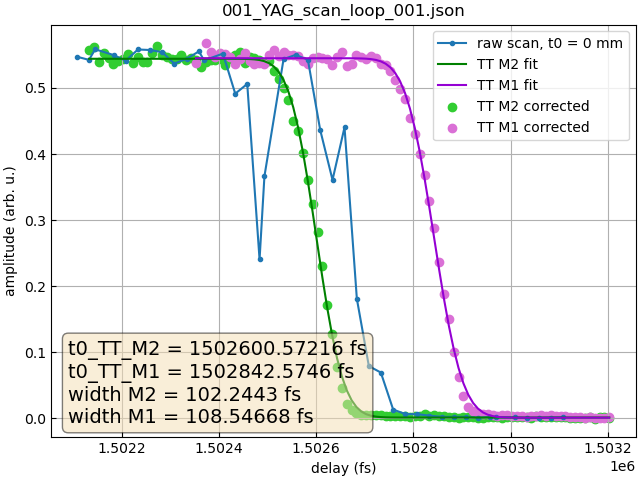

In [12]:
fig, ax = plt.subplots(constrained_layout=True)
#plt.figure(constrained_layout=True)
plt.title(fc.selected_filename)
plt.tick_params(direction='in')

#plt.plot(Delays_corr, Pump_probe_scan, 'o', color='lightblue')
plt.plot(Delay_fs_stage, pp_uncorrected, marker='.',label = 'raw scan, t0 = {} mm'.format((np.round(timezero_mm, 5))))
plt.scatter(Delay_fs_TT_M2, pp_TT_M2, color='limegreen', label = 'TT M2 corrected')
plt.scatter(Delay_fs_TT_M1, pp_TT_M1, color='orchid', label = 'TT M1 corrected')
plt.plot(Delay_fs_TT_M2, pp_fit_M2, color='green', label = 'TT M2 fit')
plt.plot(Delay_fs_TT_M1, pp_fit_M1, color='darkviolet', label = 'TT M1 fit')


boxstyle = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
boxtext = '\n'.join((r't0_TT_M2 = {} fs'.format(np.round(t0_fs_M2, 5)),
                     r't0_TT_M1 = {} fs'.format(np.round(t0_fs_M1, 5)),
            r'width M2 = {} fs'.format(np.abs(np.round(width_fs_M2, decimals = 5))),
            r'width M1 = {} fs'.format(np.abs(np.round(width_fs_M1, decimals = 5)))))
plt.text(0.03, 0.035, boxtext, transform=ax.transAxes, bbox=boxstyle, fontsize=14)

plt.xlabel('delay (fs)')
plt.ylabel('amplitude (arb. u.)')
plt.legend (loc = 'upper right')
plt.grid()
plt.show()


In [21]:
pp_TT_M1_derivative = np.abs(gaussian_filter1d(pp_TT_M1, 1, order = 1))
pp_TT_M2_derivative = np.abs(gaussian_filter1d(pp_TT_M2, 1, order = 1))

In [25]:
# gaussian ---------------> [x0, amplitude, sigma, offset]

fit = Fit(gaussian, estimate_gaussian_parameters)

fit.estimate(Delay_fs_TT_M2, pp_TT_M2_derivative)            # this sets some internal params 
#fit.p0 = better_p0(fit.p0, 0, 210.42) # overwrite some values (index) if needed: 

fit.fit(Delay_fs_TT_M2,pp_TT_M2_derivative)                  # calculate the fit
pp_fit_M2_derivative = fit.eval(Delay_fs_TT_M2)           # evaluate the curve for plotting

t0_fs_M2_derivative = fit.popt[0]
t0_mm_M2_derivative = timezero_mm + fs2mm(t0_fs_M2, 0)
width_fs_M2_derivative = fit.popt[2]*2.355
print (width_fs_M2_derivative)

99.74545603699693


In [27]:
# gaussian ---------------> [x0, amplitude, sigma, offset]

fit = Fit(gaussian, estimate_gaussian_parameters)

fit.estimate(Delay_fs_TT_M1, pp_TT_M1_derivative)            # this sets some internal params 
#fit.p0 = better_p0(fit.p0, 0, 210.42) # overwrite some values (index) if needed: 

fit.fit(Delay_fs_TT_M1,pp_TT_M1_derivative)                  # calculate the fit
pp_fit_M1_derivative = fit.eval(Delay_fs_TT_M1)           # evaluate the curve for plotting

t0_fs_M1_derivative = fit.popt[0]
t0_mm_M1_derivative = timezero_mm + fs2mm(t0_fs_M1, 0)
width_fs_M1_derivative = fit.popt[2]*2.355
print (width_fs_M1_derivative)

105.4817992098854


/sf/alvra/anaconda/alvra-analysis/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>


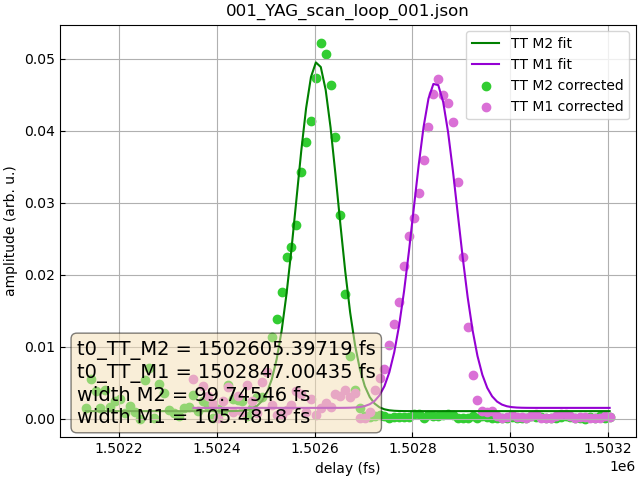

In [29]:
fig, ax = plt.subplots(constrained_layout=True)
#plt.figure(constrained_layout=True)
plt.title(fc.selected_filename)
plt.tick_params(direction='in')

#plt.plot(Delays_corr, Pump_probe_scan, 'o', color='lightblue')
#plt.plot(Delay_fs, pp_uncorrected, marker='.',label = 'raw scan, t0 = {} mm'.format((np.round(timezero_mm, 5))))
plt.scatter(Delay_fs_TT_M2, pp_TT_M2_derivative, color='limegreen', label = 'TT M2 corrected')
plt.scatter(Delay_fs_TT_M1, pp_TT_M1_derivative, color='orchid', label = 'TT M1 corrected')
plt.plot(Delay_fs_TT_M2, pp_fit_M2_derivative, color='green', label = 'TT M2 fit')
plt.plot(Delay_fs_TT_M1, pp_fit_M1_derivative, color='darkviolet', label = 'TT M1 fit')


boxstyle = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
boxtext = '\n'.join((r't0_TT_M2 = {} fs'.format(np.round(t0_fs_M2_derivative, 5)),
                     r't0_TT_M1 = {} fs'.format(np.round(t0_fs_M1_derivative, 5)),
            r'width M2 = {} fs'.format(np.abs(np.round(width_fs_M2_derivative, decimals = 5))),
            r'width M1 = {} fs'.format(np.abs(np.round(width_fs_M1_derivative, decimals = 5)))))
plt.text(0.03, 0.035, boxtext, transform=ax.transAxes, bbox=boxstyle, fontsize=14)

plt.xlabel('delay (fs)')
plt.ylabel('amplitude (arb. u.)')
plt.legend (loc = 'upper right')
plt.grid()
plt.show()

# Loop over several runs

In [41]:
datafiles = []

datafiles1 = []
datafiles2 = []

for file in glob('/sf/alvra/data/p19200/raw/scan_info/004*.json'):
    datafiles1.append(file)
datafiles1 = sorted(datafiles1, key = os.path.getmtime)
    
#for file in glob('/sf/alvra/data/p19200/raw/scan_info/003*.json'):
#    datafiles2.append(file)
#datafiles2 = sorted(datafiles2, key = os.path.getmtime)


datafiles = datafiles1# + datafiles2
#datafiles = datafiles2[2:]

datafiles = sorted(datafiles, key = os.path.getmtime)
patch = datafiles
filename = patch[0].split('/')[-1].split('.')[0]
loopname = filename[:-4]
print (loopname)
patch

004_SiN_scan_15fs_loop


['/sf/alvra/data/p19200/raw/scan_info/004_SiN_scan_15fs_loop_001.json',
 '/sf/alvra/data/p19200/raw/scan_info/004_SiN_scan_15fs_loop_002.json',
 '/sf/alvra/data/p19200/raw/scan_info/004_SiN_scan_15fs_loop_003.json',
 '/sf/alvra/data/p19200/raw/scan_info/004_SiN_scan_15fs_loop_004.json',
 '/sf/alvra/data/p19200/raw/scan_info/004_SiN_scan_15fs_loop_005.json']

In [42]:
savedir = '/das/work/p19/p19200/claudio/reduced/{}/'.format(loopname)
os.makedirs(savedir, exist_ok=True)
print (savedir)

/das/work/p19/p19200/claudio/reduced/004_SiN_scan_15fs_loop/


In [43]:
quantile_band = 0.5
binsize = 5
sigma_derivative = 1

channel_delay_motor = channel_delay_harm
#channel_delay_motor = channel_delay_global
timezero_mm = 225.26882927799852
#timezero_mm = 40.5708

targetM2 = 'YAG'
#px2fsM2 = 2.044
#px2fsM2 = 1.91 ## calibration from 14.10.2021
#px2fsM2 = 1.8 ## calibration from 15.10.2021
#px2fsM2 = 1.92 ## calibration from 16.10.2021
#px2fsM2 = 1.8692375 ## calibration from 17.10.2021
px2fsM2 = 1.7903315 ## calibration from 19.10.2021

targetM1 = 'babyYAG'
#px2fsM1 = 1.957
#px2fsM1 = 1.518 ## calibration from 14.10.2021, white light
#px2fsM1 = 1.18 ## calibration from 15.10.2021, NOPA
#px2fsM1 = 2.57 ## calibration from 16.10.2021, NOPA stretched
#px2fsM1 = 1.833608 ## calibration from 17.10.2021, white light different grating
px2fsM1 = 1.753304 ## calibration from 19.10.2021, white light different grating

filterTimeM1 = 2048
filterAmpM1 = 0

########################################################################
from sfdata import SFScanInfo
from scipy.stats import binned_statistic

Arrival_times_M1 = []
Arrival_times_M2 = []
Pump_probe_all = []
Pump_probe_uncorrected = []

t0_fs_M2_scan = []
width_fs_M2_scan = []
amplitude_M2_scan = []

t0_fs_M1_scan =[]
width_fs_M1_scan = []
amplitude_M1_scan = []

width_fs_M1_scan_derivative =[]
width_fs_M2_scan_derivative =[]

for json_file in patch:
    filename = json_file.split('/')[-1].split('.')[0]
    scan = SFScanInfo(json_file)
        
    Delay_fs_stage, Delay_fs, Delays_corr_M2, Delays_corr_M1, \
    Pump_probe, Pump_probe_scan, Izero_scan, Amplitude_M1, Amplitude_M2, pids_pump = \
    YAG_scan_two_TT(json_file, channel_delay_motor, timezero_mm, quantile_band, \
                    targetM2, px2fsM2, targetM1, px2fsM1, \
                    2048, 0, filterTimeM1, filterAmpM1)
    
#    savefile = savedir + '{}_reduced.h5'.format(filename)
#    hf = h5py.File(savefile, 'w')
#    grp = hf.create_group('uncorrected')
#    grp.create_dataset('delays_stage',data=Delay_fs_stage)
#    grp.create_dataset('pump_probe_uncorrected', data=Pump_probe)
#    grp2 = hf.create_group('TT_corrected')
#    grp2.create_dataset('delays_M1', data=Delays_corr_M1)
#    grp2.create_dataset('amplitudes_M1', data=Amplitude_M1)
#    grp2.create_dataset('delays_M2', data=Delays_corr_M2)
#    grp2.create_dataset('amplitudes_M2', data=Amplitude_M2)
#    grp2.create_dataset('pump_probe', data=Pump_probe_scan)
#    grp2.create_dataset('Izero', data=Izero_scan)
#    grp2.create_dataset('pulse_IDs', data=pids_pump)
#    hf.close()
    
    #Arrival_times_M1.append(Delays_corr_M1)
    #Arrival_times_M2.append(Delays_corr_M2)    
    #Pump_probe_all.append(Pump_probe_scan)
    #Pump_probe_uncorrected.append(Pump_probe)
    
    #Delays_corr_M2 -= Delay_fs
    #Delays_corr_M1 -= Delay_fs
    
    print (np.shape(Pump_probe_scan),np.shape(Delays_corr_M2), np.shape(Delays_corr_M1))

    binList = np.arange(Delay_fs[0] - 100, Delay_fs[-1] + 100, binsize)
    Delay_fs_TT = np.arange(Delay_fs[0] - 100 + binsize/2, Delay_fs[-1] + 100 - binsize/2, binsize)

    pp_TT_M2, binEdges, binNumber = binned_statistic(Delays_corr_M2, Pump_probe_scan, statistic='mean', bins=binList)
    pp_TT_M1, binEdges, binNumber = binned_statistic(Delays_corr_M1, Pump_probe_scan, statistic='mean', bins=binList)
    
    index_M2 = ~(np.isnan(Delay_fs_TT) | np.isnan(pp_TT_M2))
    index_M1 = ~(np.isnan(Delay_fs_TT) | np.isnan(pp_TT_M1))

    Delay_fs_TT_M2 = Delay_fs_TT[index_M2]
    Delay_fs_TT_M1 = Delay_fs_TT[index_M1]
    pp_TT_M2 =  pp_TT_M2[index_M2]
    pp_TT_M1 =  pp_TT_M1[index_M1]
    
    ############################################################
    ### Gaussian fit of the derivative for M1
    ############################################################
    
    pp_TT_M1_derivative = gaussian_filter1d(pp_TT_M1, sigma_derivative, order = 1)
    
    fit = Fit(gaussian, estimate_gaussian_parameters)
    fit.estimate(Delay_fs_TT_M1, pp_TT_M1_derivative)            # this sets some internal params 
    fit.fit(Delay_fs_TT_M1,pp_TT_M1_derivative)                  # calculate the fit
    
    width_fs_M1_derivative = fit.popt[2]*2.355
    
    ############################################################
    ### Gaussian fit of the derivative for M2
    ############################################################
    
    pp_TT_M2_derivative = gaussian_filter1d(pp_TT_M2, sigma_derivative, order = 1)
    
    fit = Fit(gaussian, estimate_gaussian_parameters)
    fit.estimate(Delay_fs_TT_M2, pp_TT_M2_derivative)            # this sets some internal params 
    fit.fit(Delay_fs_TT_M2,pp_TT_M2_derivative)                  # calculate the fit
    
    width_fs_M2_derivative = fit.popt[2]*2.355
    
    ############################################################
    ### Errfunc fit for M1
    ############################################################

    fit = Fit(errfunc_fwhm, estimate_errfunc_parameters)
    fit.estimate(Delay_fs_TT_M1, pp_TT_M1)            # this sets some internal params 
    fit.fit(Delay_fs_TT_M1,pp_TT_M1)                  # calculate the fit
    
    t0_fs_M1 = fit.popt[0]
    width_fs_M1 = fit.popt[2]
    amplitude_M1 = fit.popt[1] + fit.popt[3]
        
    ############################################################
    ### Errfunc fit for M2
    ############################################################
    
    fit = Fit(errfunc_fwhm, estimate_errfunc_parameters)
    fit.estimate(Delay_fs_TT_M2, pp_TT_M2)            # this sets some internal params 
    fit.fit(Delay_fs_TT_M2,pp_TT_M2)                  # calculate the fit

    t0_fs_M2 = fit.popt[0]
    width_fs_M2 = fit.popt[2]
    amplitude_M2 = fit.popt[1] + fit.popt[3]
    
    ############################################################
    
    t0_fs_M2_scan.append(t0_fs_M2)
    width_fs_M2_scan_derivative.append(width_fs_M2_derivative)
    width_fs_M2_scan.append(width_fs_M2)
    amplitude_M2_scan.append(amplitude_M2)
    
    t0_fs_M1_scan.append(t0_fs_M1)
    width_fs_M1_scan_derivative.append(width_fs_M1_derivative)
    width_fs_M1_scan.append(width_fs_M1)
    amplitude_M1_scan.append(amplitude_M1)


Processing: 004_SiN_scan_15fs_loop_005.json
Step 41 of 41: Processing run_000871

--------------------------------------------------------------------------------

SAR-CVME-TIFALL4:EvtSet                     1001 / 1001 ->  0% loss ▇▇▇▇▇▇▇▇▇▇
SARES11-SPEC125-M1.roi_signal_x_profile      866 / 1001 -> 13% loss ▇▇▇▇▇▇▇▇
SARES11-SPEC125-M2.roi_background_x_profile  864 / 1001 -> 14% loss ▇▇▇▇▇▇▇▇
SARES11-SPEC125-M2.roi_signal_x_profile      864 / 1001 -> 14% loss ▇▇▇▇▇▇▇▇
SAROP11-PBPS117:INTENSITY                   1000 / 1001 ->  0% loss ▇▇▇▇▇▇▇▇▇▇
SLAAR11-LMOT-M453:ENC_1_BS                  1001 / 1001 ->  0% loss ▇▇▇▇▇▇▇▇▇▇
SLAAR11-LSCP1-FNS:CH0:VAL_GET               1001 / 1001 ->  0% loss ▇▇▇▇▇▇▇▇▇▇
SLAAR11-LSCP1-FNS:CH2:VAL_GET               1001 / 1001 ->  0% loss ▇▇▇▇▇▇▇▇▇▇

over the whole data set: 740 / 1001 -> 26% loss
complete channels: 4 / 8 -> 50% incomplete

--------------------------------------------------------------------------------

Pump rep rate (FEL) is 50.0 Hz
Prob

In [60]:
Delays_corr_M1

/sf/alvra/anaconda/alvra-analysis/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([-586.07156956, -570.29183356, -552.75879356, ...,  375.31689824,
        350.77064224,  359.53716224])

In [93]:
loadfiles = []
for file in glob('/das/work/p19/p19200/claudio/reduced/012_YAG_scan_loop/012*'):
    loadfiles.append(file)
loadfiles = sorted(loadfiles, key = os.path.getmtime)
patchload = loadfiles
patchload

/sf/alvra/anaconda/alvra-analysis/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['/das/work/p19/p19200/claudio/reduced/012_YAG_scan_loop/012_YAG_scan_loop_001_reduced.h5',
 '/das/work/p19/p19200/claudio/reduced/012_YAG_scan_loop/012_YAG_scan_loop_002_reduced.h5',
 '/das/work/p19/p19200/claudio/reduced/012_YAG_scan_loop/012_YAG_scan_loop_003_reduced.h5',
 '/das/work/p19/p19200/claudio/reduced/012_YAG_scan_loop/012_YAG_scan_loop_004_reduced.h5',
 '/das/work/p19/p19200/claudio/reduced/012_YAG_scan_loop/012_YAG_scan_loop_005_reduced.h5',
 '/das/work/p19/p19200/claudio/reduced/012_YAG_scan_loop/012_YAG_scan_loop_006_reduced.h5',
 '/das/work/p19/p19200/claudio/reduced/012_YAG_scan_loop/012_YAG_scan_loop_007_reduced.h5',
 '/das/work/p19/p19200/claudio/reduced/012_YAG_scan_loop/012_YAG_scan_loop_008_reduced.h5',
 '/das/work/p19/p19200/claudio/reduced/012_YAG_scan_loop/012_YAG_scan_loop_009_reduced.h5',
 '/das/work/p19/p19200/claudio/reduced/012_YAG_scan_loop/012_YAG_scan_loop_010_reduced.h5',
 '/das/work/p19/p19200/claudio/reduced/012_YAG_scan_loop/012_YAG_scan_loop_011_r

In [94]:
binsize = 10 
sigma_derivative = 1 


#################################################################################

t0_fs_M2_scan = []
t0_fs_M2_scan_derivative = []
width_fs_M2_scan = []
width_fs_M2_scan_derivative =[]
amplitude_M2_scan = []

t0_fs_M1_scan =[]
t0_fs_M1_scan_derivative = []
width_fs_M1_scan = []
width_fs_M1_scan_derivative =[]
amplitude_M1_scan = []

for fn in loadfiles:
    print (fn)
    with h5py.File(fn, "r") as file2open:
        Delays_fs = file2open['uncorrected/delays_stage'][:]
        Delays_corr_M1 = file2open['TT_corrected/delays_M1'][:]
        Delays_corr_M2 = file2open['TT_corrected/delays_M2'][:]
        Pump_probe_scan = file2open['TT_corrected/pump_probe'][:]
        
        binList = np.arange(Delay_fs[0] - 100, Delay_fs[-1] + 100, binsize)
        Delay_fs_TT = np.arange(Delay_fs[0] - 100 + binsize/2, Delay_fs[-1] + 100 - binsize/2, binsize)

        pp_TT_M2, binEdges, binNumber = binned_statistic(Delays_corr_M2, Pump_probe_scan, statistic='mean', bins=binList)
        pp_TT_M1, binEdges, binNumber = binned_statistic(Delays_corr_M1, Pump_probe_scan, statistic='mean', bins=binList)

        index_M2 = ~(np.isnan(Delay_fs_TT) | np.isnan(pp_TT_M2))
        index_M1 = ~(np.isnan(Delay_fs_TT) | np.isnan(pp_TT_M1))

        Delay_fs_TT_M2 = Delay_fs_TT[index_M2]
        Delay_fs_TT_M1 = Delay_fs_TT[index_M1]
        pp_TT_M2 =  pp_TT_M2[index_M2]
        pp_TT_M1 =  pp_TT_M1[index_M1]

        ############################################################
        ### Gaussian fit of the derivative for M1
        ############################################################

        pp_TT_M1_derivative = gaussian_filter1d(pp_TT_M1, sigma_derivative, order = 1)

        fit = Fit(gaussian, estimate_gaussian_parameters)
        fit.estimate(Delay_fs_TT_M1, pp_TT_M1_derivative)            # this sets some internal params 
        fit.fit(Delay_fs_TT_M1,pp_TT_M1_derivative)                  # calculate the fit

        width_fs_M1_derivative = fit.popt[2]*2.355
        t0_fs_M1_derivative = fit.popt[0]

        ############################################################
        ### Gaussian fit of the derivative for M2
        ############################################################

        pp_TT_M2_derivative = gaussian_filter1d(pp_TT_M2, sigma_derivative, order = 1)

        fit = Fit(gaussian, estimate_gaussian_parameters)
        fit.estimate(Delay_fs_TT_M2, pp_TT_M2_derivative)            # this sets some internal params 
        fit.fit(Delay_fs_TT_M2,pp_TT_M2_derivative)                  # calculate the fit

        width_fs_M2_derivative = fit.popt[2]*2.355
        t0_fs_M2_derivative = fit.popt[0]

        ############################################################
        ### Errfunc fit for M1
        ############################################################

        fit = Fit(errfunc_fwhm, estimate_errfunc_parameters)
        fit.estimate(Delay_fs_TT_M1, pp_TT_M1)            # this sets some internal params 
        fit.fit(Delay_fs_TT_M1,pp_TT_M1)                  # calculate the fit

        t0_fs_M1 = fit.popt[0]
        width_fs_M1 = fit.popt[2]
        amplitude_M1 = fit.popt[1] + fit.popt[3]

        ############################################################
        ### Errfunc fit for M2
        ############################################################

        fit = Fit(errfunc_fwhm, estimate_errfunc_parameters)
        fit.estimate(Delay_fs_TT_M2, pp_TT_M2)            # this sets some internal params 
        fit.fit(Delay_fs_TT_M2,pp_TT_M2)                  # calculate the fit

        t0_fs_M2 = fit.popt[0]
        width_fs_M2 = fit.popt[2]
        amplitude_M2 = fit.popt[1] + fit.popt[3]

        ############################################################

        t0_fs_M2_scan.append(t0_fs_M2)
        t0_fs_M2_scan_derivative.append(t0_fs_M2_derivative)
        width_fs_M2_scan.append(width_fs_M2)
        width_fs_M2_scan_derivative.append(width_fs_M2_derivative)
        amplitude_M2_scan.append(amplitude_M2)

        t0_fs_M1_scan.append(t0_fs_M1)
        t0_fs_M1_scan_derivative.append(t0_fs_M1_derivative)
        width_fs_M1_scan.append(width_fs_M1)
        width_fs_M1_scan_derivative.append(width_fs_M1_derivative)
        amplitude_M1_scan.append(amplitude_M1)
        

/das/work/p19/p19200/claudio/reduced/012_YAG_scan_loop/012_YAG_scan_loop_001_reduced.h5
/das/work/p19/p19200/claudio/reduced/012_YAG_scan_loop/012_YAG_scan_loop_002_reduced.h5
/das/work/p19/p19200/claudio/reduced/012_YAG_scan_loop/012_YAG_scan_loop_003_reduced.h5
/das/work/p19/p19200/claudio/reduced/012_YAG_scan_loop/012_YAG_scan_loop_004_reduced.h5
/das/work/p19/p19200/claudio/reduced/012_YAG_scan_loop/012_YAG_scan_loop_005_reduced.h5
/das/work/p19/p19200/claudio/reduced/012_YAG_scan_loop/012_YAG_scan_loop_006_reduced.h5
/das/work/p19/p19200/claudio/reduced/012_YAG_scan_loop/012_YAG_scan_loop_007_reduced.h5
/das/work/p19/p19200/claudio/reduced/012_YAG_scan_loop/012_YAG_scan_loop_008_reduced.h5
/das/work/p19/p19200/claudio/reduced/012_YAG_scan_loop/012_YAG_scan_loop_009_reduced.h5
/das/work/p19/p19200/claudio/reduced/012_YAG_scan_loop/012_YAG_scan_loop_010_reduced.h5
/das/work/p19/p19200/claudio/reduced/012_YAG_scan_loop/012_YAG_scan_loop_011_reduced.h5
/das/work/p19/p19200/claudio/red

/sf/alvra/anaconda/alvra-analysis/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


/das/work/p19/p19200/claudio/reduced/012_YAG_scan_loop/012_YAG_scan_loop_030_reduced.h5
/das/work/p19/p19200/claudio/reduced/012_YAG_scan_loop/012_YAG_scan_loop_031_reduced.h5
/das/work/p19/p19200/claudio/reduced/012_YAG_scan_loop/012_YAG_scan_loop_032_reduced.h5
/das/work/p19/p19200/claudio/reduced/012_YAG_scan_loop/012_YAG_scan_loop_033_reduced.h5
/das/work/p19/p19200/claudio/reduced/012_YAG_scan_loop/012_YAG_scan_loop_034_reduced.h5
/das/work/p19/p19200/claudio/reduced/012_YAG_scan_loop/012_YAG_scan_loop_035_reduced.h5
/das/work/p19/p19200/claudio/reduced/012_YAG_scan_loop/012_YAG_scan_loop_036_reduced.h5
/das/work/p19/p19200/claudio/reduced/012_YAG_scan_loop/012_YAG_scan_loop_037_reduced.h5
/das/work/p19/p19200/claudio/reduced/012_YAG_scan_loop/012_YAG_scan_loop_038_reduced.h5
/das/work/p19/p19200/claudio/reduced/012_YAG_scan_loop/012_YAG_scan_loop_039_reduced.h5
/das/work/p19/p19200/claudio/reduced/012_YAG_scan_loop/012_YAG_scan_loop_040_reduced.h5
/das/work/p19/p19200/claudio/red

/das/work/p19/p19200/claudio/reduced/012_YAG_scan_loop/012_YAG_scan_loop_146_reduced.h5
/das/work/p19/p19200/claudio/reduced/012_YAG_scan_loop/012_YAG_scan_loop_147_reduced.h5
/das/work/p19/p19200/claudio/reduced/012_YAG_scan_loop/012_YAG_scan_loop_148_reduced.h5
/das/work/p19/p19200/claudio/reduced/012_YAG_scan_loop/012_YAG_scan_loop_149_reduced.h5
/das/work/p19/p19200/claudio/reduced/012_YAG_scan_loop/012_YAG_scan_loop_150_reduced.h5
/das/work/p19/p19200/claudio/reduced/012_YAG_scan_loop/012_YAG_scan_loop_151_reduced.h5
/das/work/p19/p19200/claudio/reduced/012_YAG_scan_loop/012_YAG_scan_loop_152_reduced.h5
/das/work/p19/p19200/claudio/reduced/012_YAG_scan_loop/012_YAG_scan_loop_153_reduced.h5
/das/work/p19/p19200/claudio/reduced/012_YAG_scan_loop/012_YAG_scan_loop_154_reduced.h5


<IPython.core.display.Javascript object>


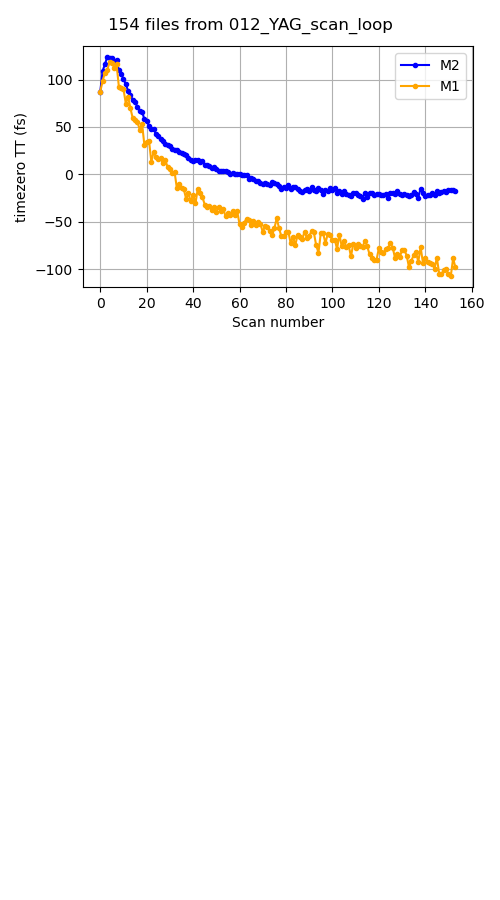

In [95]:
offset = t0_fs_M2_scan[0] - t0_fs_M1_scan[0]

plt.figure(figsize = (5,9))
plt.suptitle('{} files from {}'.format(len(patchload), patchload[0].split('/')[-2]))

plt.subplot(311)
plt.plot(np.asarray(t0_fs_M2_scan), marker='.', color ='blue',  label='M2')
#plt.plot(np.asarray(t0_fs_M2_scan_derivative), marker='.', color = 'royalblue', label='M2_der')

plt.plot(np.asarray(t0_fs_M1_scan) + offset, marker='.', color = 'orange', label='M1')
#plt.plot(np.asarray(t0_fs_M1_scan_derivative) + offset, marker='.', color = 'gold', label='M1_der')
plt.legend(loc='best')
plt.xlabel('Scan number')
plt.ylabel('timezero TT (fs)')
plt.grid()

plt.tight_layout()


In [77]:
patchload[0].split('/')[-2]

'001_YAG_scan_loop'

In [423]:
a=-21.216602625262777, -21.669049481177595, -22.03203783562902, -21.65361841100777, -24.645469485887926, -20.440461738638763, -20.279862655673647, -20.95596827287342, -17.607797455628678, -21.168718092929065, -22.286166332545985, -20.513906895746842, -22.12076616025715, -22.520256550711277, -22.474540694594012, -19.64692817945109, -21.314630706613364, -25.515156159139828, -15.069644906616617, -20.012509283075975, -23.173686360936088, -21.56569280943572, -22.03368853700504, -20.157439389322608, -22.459945469125596, -17.16691779012337, -19.625710905785827, -18.061227850066043, -18.000504019318388, -18.596902320362723, -16.810951230108376, -16.584432678544246, -16.314683197986284, -17.846562469407775
tim_a = np.arange(121,121+34)
print(tim_a)
b=-240.5866399243641, -244.2782513867383, -244.77120477026656, -240.68854603049508, -239.83841310337797, -234.28635932442143, -239.8808840863835, -250.3376016929077, -246.49082394953086, -248.3871687202646, -242.39734990961182, -241.87351052765652, -247.43684375318495, -260.1495545271901, -253.04697863540895, -248.04535447076228, -244.78797987123977, -255.84981217328772, -238.80794075776313, -255.65848457598267, -250.1764445828278, -254.3970119041766, -255.0741157900693, -256.49858261336044, -260.6602992047501, -249.838056380808, -266.9582011739221, -266.6943403449041, -263.4998785808904, -262.4969934268122, -267.8789296781031, -269.5198668485693, -250.66761078455556, -259.896446228399

aa=[-21.474814275994035, -22.19591166788355, -22.75105555541159, -25.056462636934928, -23.13216473763873, -24.132174106508646, -26.909922911618004, -26.028880776933004, -28.449588016934438, -32.28412641673296, -36.084475258245554, -31.752812067258365, -36.93067019314073, -34.222899286516686, -34.99058668778512, -41.034941341500684]
tim_aa=np.arange(121+35,121+35+16)
bb= [-267.4020218873306, -268.574180730494, -265.12631747661345, -261.64734500778957, -256.5616889744878, -260.88733984278775, -256.3832608906728, -271.2924187373089, -267.1365532233496, -267.120544871848, -272.6324407283308, -267.6392162531996, -264.00572819846985, -261.8190056362085, -262.2447588785268, -261.15501963813296]
np.size(bb)



[121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154]


16

/sf/alvra/anaconda/alvra-analysis/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>


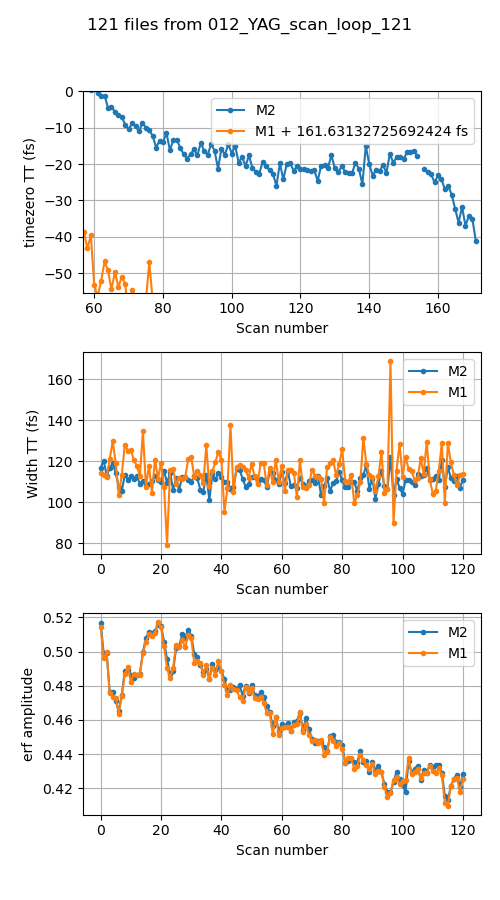

In [428]:
offset = t0_fs_M2_scan[0] - t0_fs_M1_scan[0]
#offset = 0

plt.figure(figsize = (5,9))
plt.suptitle ('{} files from {}'.format(len(patch), json_file.split('/')[-1].split('.')[0]))

plt.subplot(311)
plt.plot(np.asarray(t0_fs_M2_scan), marker='.', label='M2')
plt.plot(tim_a,np.asarray(a),marker='.', color='tab:blue')
plt.plot(tim_aa,np.asarray(aa),marker='.', color='tab:blue')

plt.plot(np.asarray(t0_fs_M1_scan)+offset, marker='.', label='M1 + {} fs'.format(offset))
plt.plot(tim_a,np.asarray(b)+offset,marker='.', color='tab:orange')
plt.plot(tim_aa,np.asarray(bb)+offset,marker='.', color='tab:orange')

#plt.plot(np.asarray(t0_fs_M1_scan)+offset - np.asarray(t0_fs_M2_scan))
plt.legend(loc='best')
plt.xlabel('Scan number')
plt.ylabel('timezero TT (fs)')
plt.grid()

plt.subplot(312)
#plt.plot((np.abs(width_fs_M2_scan_derivative)*2.355), marker='.', label='M2')
#plt.plot((np.abs(width_fs_M1_scan_derivative)*2.355), marker='.', label='M1')
plt.plot((np.abs(width_fs_M2_scan)), marker='.', label='M2')
plt.plot((np.abs(width_fs_M1_scan)), marker='.', label='M1')

plt.legend(loc='best')
plt.xlabel("Scan number")
plt.ylabel('Width TT (fs)')
plt.grid()

plt.subplot(313)
plt.plot(np.abs(amplitude_M2_scan), marker='.', label='M2')
plt.plot(np.abs(amplitude_M1_scan), marker='.', label='M1')
plt.legend(loc='best')
plt.xlabel("Scan number")
plt.ylabel('erf amplitude')
plt.grid()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [48]:
widths_10fs = np.abs(width_fs_M1_scan_derivative).copy()
print (widths_10fs.std(), widths_10fs.mean()*2.355)

27.45513751738402 62.57358333123735


In [325]:
widths_50fs = np.abs(width_fs_M1_scan_derivative).copy()

In [377]:
width_fs_M1_scan_derivative

/sf/alvra/anaconda/alvra-analysis/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[-48.7719490359668,
 -41.98515524313186,
 -44.6814162450202,
 -53.23207233849918,
 -51.268530719609444,
 -48.68591206925875,
 -42.29775496882914,
 -49.1729504380812,
 -59.226410065403364,
 -54.76070132587994,
 -52.90254134171718,
 -51.62833013822741,
 -51.92207206783837,
 -49.42538832328302,
 -60.28510148402403,
 -118.19814082613102,
 -120.96850416944686,
 115.74174325780533,
 -127.4655236739417,
 -135.39833039166393,
 -124.12769040575411,
 -111.09723922158545,
 115.73673605060338,
 -129.30185813042084,
 118.26030195662115,
 129.63470647451214,
 127.68753431093813,
 137.62651006841057,
 134.83333480931978,
 149.0981712715928,
 141.52138459868237,
 156.22506359262567,
 145.48254445505555,
 -148.4146777727148,
 -126.18335752924828,
 -141.6550977301673,
 -158.9022061969567,
 -147.49451682485278,
 -153.35130676770135,
 -167.66951337940935,
 -149.49137090039702,
 -134.08170917951796,
 -145.56424309197521,
 -128.82316686013718,
 -128.56864321497582,
 -145.00112355793658,
 -149.25455797333694

In [378]:
np.abs(np.mean(np.abs(width_fs_M1_scan_derivative[:-1])))*2.355
np.std(np.abs(width_fs_M1_scan_derivative[:-1]))

34.32097607285718

/sf/alvra/anaconda/alvra-analysis/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>


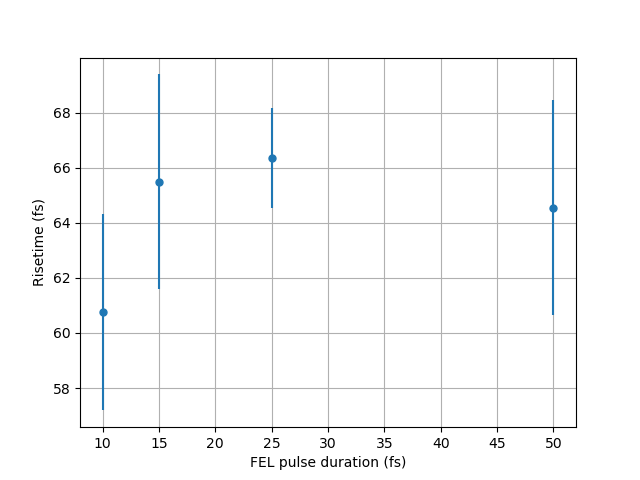

In [332]:
pulselength = np.array([10, 15, 25, 50])
widths = np.array([60.75, 65.4866, 66.346, 64.544])
errbars = np.array([3.56, 3.9, 1.822, 3.9])

plt.figure()
plt.errorbar(pulselength, widths, yerr = errbars, fmt='.', ms = 10)
plt.xlabel('FEL pulse duration (fs)')
plt.ylabel('Risetime (fs)')
plt.grid()

plt.show()

In [225]:
np.sqrt(30**2 + 20**2 + 50**2 + 30**2 + 10**2)

50.24937810560445

/sf/alvra/anaconda/alvra-analysis/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>


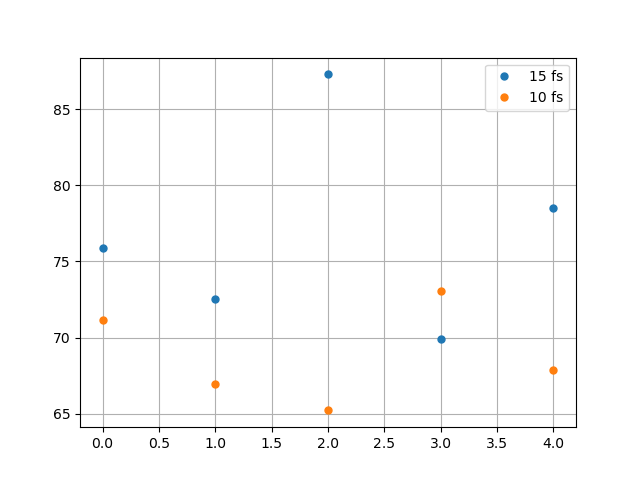

In [185]:
plt.figure()
plt.plot(widths_15fs*2.355, '.', ms=10, label='15 fs')
plt.plot(widths_10fs*2.355, '.', ms=10, label='10 fs' )
plt.legend(loc='best')
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


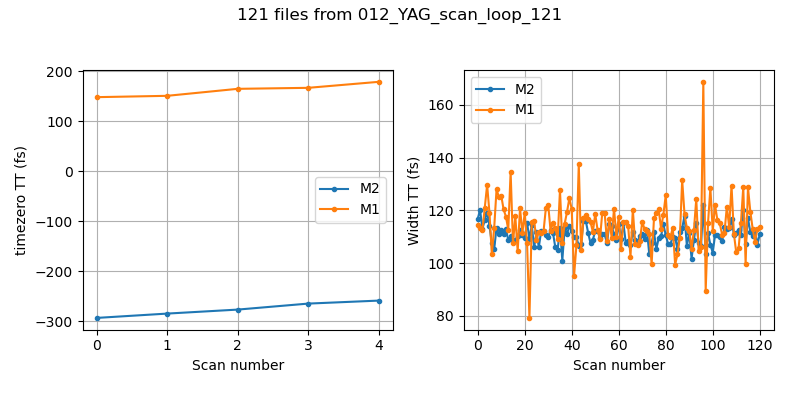

In [379]:
plt.figure(figsize = (8,4))
plt.suptitle ('{} files from {}'.format(len(patch), json_file.split('/')[-1].split('.')[0]))

plt.subplot(121)
plt.plot(np.asarray(t0_fs_M2_scan_derivative)-200, marker='.', label='M2')
plt.plot(t0_fs_M1_scan_derivative, marker='.', label='M1')
plt.legend(loc='best')
plt.xlabel('Scan number')
plt.ylabel('timezero TT (fs)')
plt.grid()

plt.subplot(122)
plt.plot(width_fs_M2_scan, marker='.', label='M2')
plt.plot(width_fs_M1_scan, marker='.', label='M1')
plt.legend(loc='best')
plt.xlabel("Scan number")
plt.ylabel('Width TT (fs)')
plt.grid()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

##  Timing tool traces & statistics

In [381]:
fc = FileChooser('/sf/alvra/data/p19200/raw/scan_info/')
fc.use_dir_icons = True
display(fc)

FileChooser(path='/sf/alvra/data/p19200/raw/scan_info', filename='', title='HTML(value='', layout=Layout(displ…

In [389]:
targetM2 = 'YAG'
#px2fsM2 = 2.044
#px2fsM2 = 1.91 ## calibration from 14.10.2021
px2fsM2 = 1.8 ## calibration from 15.10.2021

targetM1 = 'babyYAG'
#px2fsM1 = 1.957
px2fsM1 = 1.518 ## calibration from 14.10.2021, white light
px2fsM1 = 1.18 ## calibration from 15.10.2021, NOPA

arrTimes_M2, arrTimesAmp_M2, arrTimes_M2_scan, arrTimesAmp_M2_scan, peaktraces_M2,\
arrTimes_M1, arrTimesAmp_M1, arrTimes_M1_scan, arrTimesAmp_M1_scan, peaktraces_M1 = \
Two_TT_statistics_scan(fc.selected,  targetM2, px2fsM2, targetM1, px2fsM1)


Processing: 012_YAG_scan_loop_145.json
Step 41 of 41: Processing run_007774

--------------------------------------------------------------------------------

SAR-CVME-TIFALL4:EvtSet                     500 / 500 ->  0% loss ▇▇▇▇▇▇▇▇▇▇
SARES11-SPEC125-M1.roi_signal_x_profile     399 / 500 -> 20% loss ▇▇▇▇▇▇▇▇
SARES11-SPEC125-M2.roi_background_x_profile 500 / 500 ->  0% loss ▇▇▇▇▇▇▇▇▇▇
SARES11-SPEC125-M2.roi_signal_x_profile     500 / 500 ->  0% loss ▇▇▇▇▇▇▇▇▇▇

over the whole data set: 399 / 500 -> 20% loss
complete channels: 3 / 4 -> 25% incomplete

--------------------------------------------------------------------------------

Pump rep rate (FEL) is 50.0 Hz
Probe rep rate (laser) is 100.0 Hz
File recorded at 2021-10-20 09:21:10.912259
/sf/alvra/data/p19200/scratch/2021-10-18-19:07-psen-background.txt
/sf/alvra/data/p19200/scratch/2021-10-18-19:07-psen-peak-background.txt


/sf/alvra/anaconda/alvra-analysis/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>


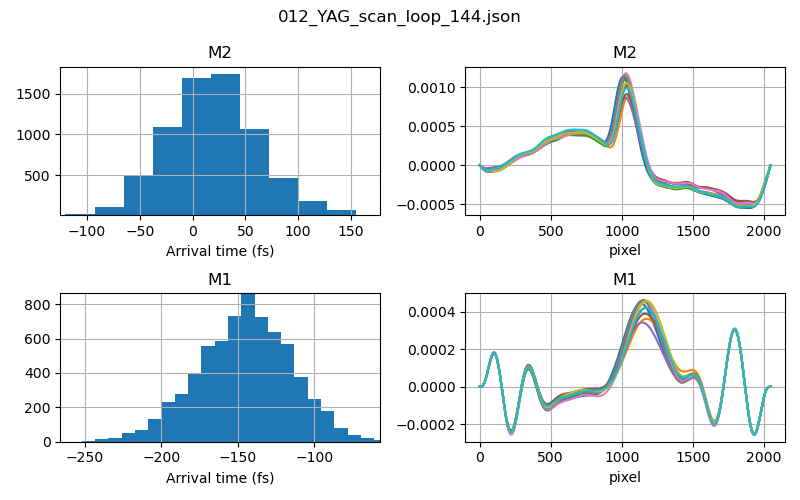

M2
Statistics on all (6936,) shots of the scan
Offset compared to pixel 1048 is 19.516089965397924 fs
Jitter, i.e. width (std) of the histogram 43.4241021517706 fs
--------------------------------------------------------------
Statistics on (197,) shots of the last step of the scan
Offset compared to pixel 1048 is 27.000000000000004 fs
Jitter, i.e. width (std) of the histogram 27.664612077911375 fs
**************************************************************
M1
Statistics on all (6936,) shots of the scan
Offset compared to pixel 1048 is -155.0364504036909 fs
Jitter, i.e. width (std) of the histogram 90.78202761738189 fs
--------------------------------------------------------------
Statistics on (197,) shots of the last step of the scan
Offset compared to pixel 1048 is -139.21604060913705 fs
Jitter, i.e. width (std) of the histogram 58.76520510060453 fs


In [388]:
plt.figure(figsize = (8,5))
plt.suptitle (fc.selected_filename)

plt.subplot(221)
plt.title('M2')
plt.hist(arrTimes_M2_scan, bins=30)
plt.grid()
plt.xlim(-500,500)
plt.xlabel('Arrival time (fs)')

plt.subplot(222)
plt.title('M2')
for i in range(10):
   # plt.plot(sigtraces[i][200:1500])
    #plt.plot(pixelNum[100:2047], sigtraces[i][0:1947])
    plt.plot(peaktraces_M2[i])#*10000)
plt.xlabel ('pixel')
#plt.xlim(500,1500)
plt.grid()

plt.subplot(223)
plt.title('M1')
plt.hist(arrTimes_M1_scan, bins=100)
plt.grid()
#plt.xlim(-1000,0)
plt.xlabel('Arrival time (fs)')

plt.subplot(224)
plt.title('M1')
for i in range(10):
   # plt.plot(sigtraces[i][200:1500])
    #plt.plot(pixelNum[100:2047], sigtraces[i][0:1947])
    plt.plot(peaktraces_M1[i])#*10000)
plt.xlabel ('pixel')
#plt.xlim(500,1500)
plt.grid()

plt.tight_layout()
plt.show()

print("M2")
print("Statistics on all {} shots of the scan".format(np.shape(arrTimes_M2_scan)))
print("Offset compared to pixel 1048 is {} fs".format(np.mean(arrTimes_M2_scan)))
print("Jitter, i.e. width (std) of the histogram {} fs".format(np.std(arrTimes_M2_scan)))
print("--------------------------------------------------------------")
print("Statistics on {} shots of the last step of the scan".format(np.shape(arrTimes_M2)))
print("Offset compared to pixel 1048 is {} fs".format(np.mean(arrTimes_M2)))
print("Jitter, i.e. width (std) of the histogram {} fs".format(np.std(arrTimes_M2)))
print("**************************************************************")
print("M1")
print("Statistics on all {} shots of the scan".format(np.shape(arrTimes_M1_scan)))
print("Offset compared to pixel 1048 is {} fs".format(np.mean(arrTimes_M1_scan)))
print("Jitter, i.e. width (std) of the histogram {} fs".format(np.std(arrTimes_M1_scan)))
print("--------------------------------------------------------------")
print("Statistics on {} shots of the last step of the scan".format(np.shape(arrTimes_M1)))
print("Offset compared to pixel 1048 is {} fs".format(np.mean(arrTimes_M1)))
print("Jitter, i.e. width (std) of the histogram {} fs".format(np.std(arrTimes_M1)))
